# Proyecto #2: EDA - Exploratory Data Analysis
Dataset de Ventas por Producto y Sucursal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Para gráficos de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

 2. Comprensión Inicial del Dataset
Punto 2a-2d 

In [ ]:
# 2a. Cargar el dataset y visualizar las primeras filas
ruta_dataset = r"C:\Users\hsuna\Desktop\Proyecto Final Product Development\repo_final_project_pd\data\raw\Dataset_Product_Development\Dataset Product Development.csv"
df = pd.read_csv(ruta_dataset)

print("="*80)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*80)
display(df.head())

print("\n" + "="*80)
print("ÚLTIMAS 5 FILAS DEL DATASET")
print("="*80)
display(df.tail())

# %%
# 2b. Mostrar el tamaño del dataset
print("="*80)
print("TAMAÑO DEL DATASET")
print("="*80)
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Total de registros: {df.shape[0] * df.shape[1]:,}")

# %%
# 2c. Descripción de cada columna
print("="*80)
print("DESCRIPCIÓN DE LAS COLUMNAS")
print("="*80)
descripcion_columnas = {
    'Codigo_Sucursal': 'Identificador único de cada una de las 7 sucursales',
    'Fecha_Venta': 'Fecha de emisión de la venta diaria',
    'Codigo_Producto': 'Identificador de los 15 productos con mayor volumen de ventas',
    'Unidades_Vendidas': 'Cantidad total de unidades vendidas por día y sucursal',
    'Total': 'Importe total de ventas en quetzales'
}

for col, desc in descripcion_columnas.items():
    print(f"\n{col}:")
    print(f"  → {desc}")

print("\n" + "="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
df.info()

# %%
# 2d. Identificar el rango temporal de los datos
# Primero convertir la fecha
df['Fecha_Venta'] = pd.to_datetime(df['Fecha_Venta'], format='%d/%m/%Y')


print("="*80)
print("RANGO TEMPORAL DE LOS DATOS")
print("="*80)
fecha_min = df['Fecha_Venta'].min()
fecha_max = df['Fecha_Venta'].max()
dias_totales = (fecha_max - fecha_min).days

print(f"Fecha mínima: {fecha_min.strftime('%d/%m/%Y')}")
print(f"Fecha máxima: {fecha_max.strftime('%d/%m/%Y')}")
print(f"Período total: {dias_totales} días ({dias_totales/365:.1f} años)")


PRIMERAS 5 FILAS DEL DATASET


,Codigo_Sucursal,Fecha_Venta,Codigo_Producto,Unidades_Vendidas,Total
0,11,02/01/2020,P105400,486,1324.5
1,12,02/01/2020,P407780,80,218.0
2,1,02/01/2020,P407780,366,1000.5
3,1,02/01/2020,P185447,504,302.4
4,6,02/01/2020,P958288,1452,1102.8



ÚLTIMAS 5 FILAS DEL DATASET


,Codigo_Sucursal,Fecha_Venta,Codigo_Producto,Unidades_Vendidas,Total
73148,11,22/10/2025,P967817,3702,14756.7
73149,6,22/10/2025,P958288,24,22.2
73150,9,22/10/2025,P958288,24,26.4
73151,1,22/10/2025,P165627,228,171.0
73152,9,22/10/2025,P847357,732,2488.8


TAMAÑO DEL DATASET
Número de filas: 73,153
Número de columnas: 5
Total de registros: 365,765
DESCRIPCIÓN DE LAS COLUMNAS

Código_Sucursal:
  → Identificador único de cada una de las 7 sucursales

Fecha_Factura:
  → Fecha de emisión de la venta diaria

Código_Producto:
  → Identificador de los 15 productos con mayor volumen de ventas

Unidades_Vendidas:
  → Cantidad total de unidades vendidas por día y sucursal

Total:
  → Importe total de ventas en quetzales

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Codigo_Sucursal    73153 non-null  int64  
 1   Fecha_Venta        73153 non-null  object 
 2   Codigo_Producto    73153 non-null  object 
 3   Unidades_Vendidas  73153 non-null  int64  
 4   Total              73153 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ M

 3. Validación de la Estructura de los Datos
Punto 3a-3c 

In [5]:
# 3a. Verificar los tipos de datos
print("="*80)
print("TIPOS DE DATOS DE CADA VARIABLE")
print("="*80)
print(df.dtypes)
print("\n")

# Clasificación de variables
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = [col for col in df.columns if col not in variables_numericas and col != 'Fecha_Venta']
variables_temporales = ['Fecha_Venta']

print(f"Variables numéricas: {variables_numericas}")
print(f"Variables categóricas: {variables_categoricas}")
print(f"Variables temporales: {variables_temporales}")

# %%
# 3b. Confirmar formato datetime
print("="*80)
print("VALIDACIÓN DE FORMATO DATETIME")
print("="*80)
print(f"Tipo de dato de Fecha_Venta: {df['Fecha_Venta'].dtype}")
print(f"¿Es datetime64? {pd.api.types.is_datetime64_any_dtype(df['Fecha_Venta'])}")

# %%
# 3c. Validar frecuencia temporal
print("="*80)
print("ANÁLISIS DE FRECUENCIA TEMPORAL")
print("="*80)

# Agrupar por fecha para ver la consistencia
ventas_por_fecha = df.groupby('Fecha_Venta').size()
diferencias_dias = df['Fecha_Venta'].sort_values().diff().dt.days.dropna()

print(f"Registros por fecha (primeros 10):")
print(ventas_por_fecha.head(10))
print(f"\nEstadísticas de diferencias entre fechas consecutivas:")
print(diferencias_dias.describe())

# Verificar si hay fechas faltantes
fecha_rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
fechas_faltantes = fecha_rango_completo.difference(df['Fecha_Venta'].unique())
print(f"\nNúmero de fechas faltantes en el rango: {len(fechas_faltantes)}")
if len(fechas_faltantes) > 0 and len(fechas_faltantes) <= 10:
    print(f"Fechas faltantes: {fechas_faltantes.tolist()}")


TIPOS DE DATOS DE CADA VARIABLE
Codigo_Sucursal               int64
Fecha_Venta          datetime64[ns]
Codigo_Producto              object
Unidades_Vendidas             int64
Total                       float64
dtype: object


Variables numéricas: ['Codigo_Sucursal', 'Unidades_Vendidas', 'Total']
Variables categóricas: ['Codigo_Producto']
Variables temporales: ['Fecha_Venta']
VALIDACIÓN DE FORMATO DATETIME
Tipo de dato de Fecha_Venta: datetime64[ns]
¿Es datetime64? True
ANÁLISIS DE FRECUENCIA TEMPORAL
Registros por fecha (primeros 10):
Fecha_Venta
2020-01-02    29
2020-01-03    36
2020-01-04    29
2020-01-06    37
2020-01-07    38
2020-01-08    37
2020-01-09    40
2020-01-10    37
2020-01-11    34
2020-01-13    36
dtype: int64

Estadísticas de diferencias entre fechas consecutivas:
count    73152.000000
mean         0.028981
std          0.206938
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: Fecha_Venta, dtype: floa

4. Análisis de Valores Faltantes y Duplicados
Punto 4a-4c

In [25]:
# 4a. Identificar valores nulos
print("="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

valores_nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

resumen_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Porcentaje': porcentaje_nulos
})

print(resumen_nulos)
print(f"\nTotal de valores nulos en el dataset: {df.isnull().sum().sum()}")

# Visualización de valores nulos
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Mapa de Valores Nulos')
    plt.show()

# %%
# 4b. Estrategia para valores faltantes
print("="*80)
print("ESTRATEGIA PARA VALORES FALTANTES")
print("="*80)

if df.isnull().sum().sum() > 0:
    print("ESTRATEGIA DEFINIDA:")
    print("- Para valores nulos en variables numéricas (Unidades_Vendidas, Total):")
    print("  → Imputación con la mediana por producto y sucursal")
    print("- Para valores nulos en variables categóricas:")
    print("  → Eliminación de registros (si son pocos)")
    print("- Para valores nulos en fechas:")
    print("  → Eliminación de registros")
else:
    print("No se encontraron valores faltantes en el dataset")
    print("No es necesario aplicar ninguna estrategia de imputación")

# %%
# 4c. Verificar duplicados
print("="*80)
print("ANÁLISIS DE REGISTROS DUPLICADOS")
print("="*80)

duplicados_totales = df.duplicated().sum()
print(f"Registros duplicados (todas las columnas): {duplicados_totales}")

# Verificar duplicados por combinación de fecha, sucursal y producto
duplicados_clave = df.duplicated(subset=['Fecha_Venta', 'Codigo_Sucursal', 'Codigo_Producto']).sum()
print(f"Registros duplicados (Fecha-Sucursal-Producto): {duplicados_clave}")

if duplicados_clave > 0:
    print("\nESTRATEGIA PARA DUPLICADOS:")
    print("- Sumar las ventas de registros duplicados")
    print("- Consolidar en un solo registro por combinación")
    
    # Mostrar ejemplo de duplicados
    df_duplicados = df[df.duplicated(subset=['Fecha_Venta', 'Codigo_Sucursal', 'Codigo_Producto'], keep=False)]
    if len(df_duplicados) > 0:
        print("\nEjemplo de registros duplicados:")
        display(df_duplicados.head(10))
else:
    print("No se encontraron registros duplicados")
    print("Cada combinación de fecha-sucursal-producto es única")


ANÁLISIS DE VALORES FALTANTES
                   Valores_Nulos  Porcentaje
Codigo_Sucursal                0         0.0
Fecha_Venta                    0         0.0
Codigo_Producto                0         0.0
Unidades_Vendidas              0         0.0
Total                          0         0.0
Año                            0         0.0
Mes                            0         0.0
Mes_Nombre                     0         0.0
Día_Semana                     0         0.0
Semana                         0         0.0
Trimestre                      0         0.0

Total de valores nulos en el dataset: 0
ESTRATEGIA PARA VALORES FALTANTES
No se encontraron valores faltantes en el dataset
No es necesario aplicar ninguna estrategia de imputación
ANÁLISIS DE REGISTROS DUPLICADOS
Registros duplicados (todas las columnas): 0
Registros duplicados (Fecha-Sucursal-Producto): 0
No se encontraron registros duplicados
Cada combinación de fecha-sucursal-producto es única


5. Análisis Descriptivo General

ESTADÍSTICAS DESCRIPTIVAS GENERALES


,Codigo_Sucursal,Fecha_Venta,Unidades_Vendidas,Total
count,73153.000000,73153,73153.000000,73153.000000
mean,6.698194,2023-01-01 14:20:40.632647168,318.350129,903.422309
min,1.000000,2020-01-02 00:00:00,1.000000,0.700000
25%,4.000000,2021-08-12 00:00:00,28.000000,53.400000
50%,6.000000,2023-01-07 00:00:00,96.000000,204.000000
75%,11.000000,2024-05-16 00:00:00,276.000000,651.000000
max,12.000000,2025-10-22 00:00:00,110756.000000,381343.500000
std,3.654142,NaN,1247.094748,4100.515541



ESTADÍSTICAS DETALLADAS POR VARIABLE

Unidades_Vendidas:
  Media: 318.35
  Mediana: 96.00
  Mínimo: 1.00
  Máximo: 110,756.00
  Desviación estándar: 1,247.09
  Coeficiente de variación: 391.74%

Total:
  Media: 903.42
  Mediana: 204.00
  Mínimo: 0.70
  Máximo: 381,343.50
  Desviación estándar: 4,100.52
  Coeficiente de variación: 453.89%
ANÁLISIS DE VENTAS POR PRODUCTO


,Total_Ventas,Venta_Promedio,Num_Transacciones,Total_Unidades,Unidades_Promedio
Codigo_Producto,,,,,
P105400,10827190.15,1660.36,6521,3289162,504.40
P407780,9146653.25,1563.80,5849,2729360,466.64
P966547,6235175.70,986.42,6321,1502070,237.63
P967817,5939242.10,4445.54,1336,1421198,1063.77
P847357,4995610.00,1454.75,3434,1591786,463.54
P831996,4490941.25,1760.46,2551,1214732,476.18
P715789,4470623.20,6090.77,734,1120749,1526.91
P513865,4014753.95,601.01,6680,1093417,163.69
P229767,3312956.95,1041.81,3180,1011546,318.10


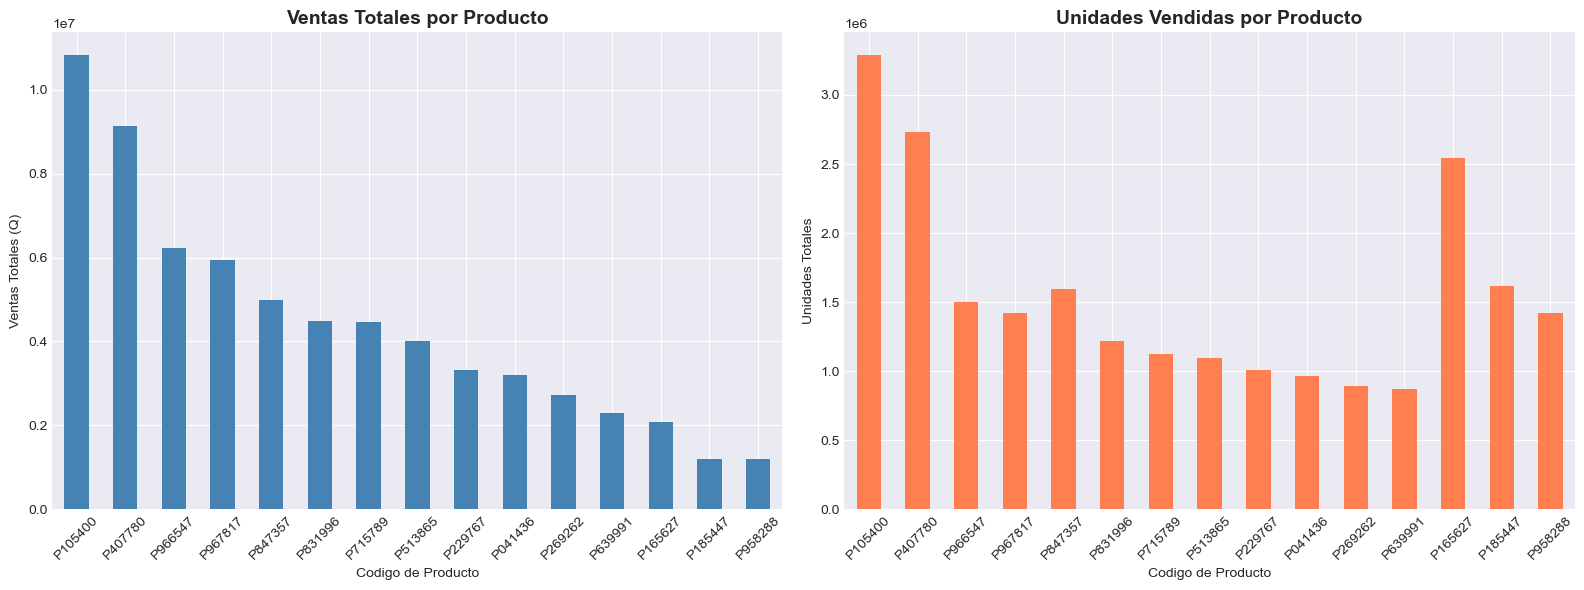

ANÁLISIS DE VENTAS POR SUCURSAL


,Total_Ventas,Venta_Promedio,Num_Transacciones,Total_Unidades,Unidades_Promedio
Codigo_Sucursal,,,,,
5,18006561.65,1502.80,11982,6186687,516.33
9,11154398.74,1229.00,9076,3630033,399.96
4,10235764.15,976.14,10486,3623925,345.60
6,9208113.05,848.13,10857,3185865,293.44
1,8441216.80,790.52,10678,3142344,294.28
11,5755009.45,561.30,10253,2036407,198.62
12,3286988.35,334.69,9821,1483006,151.00


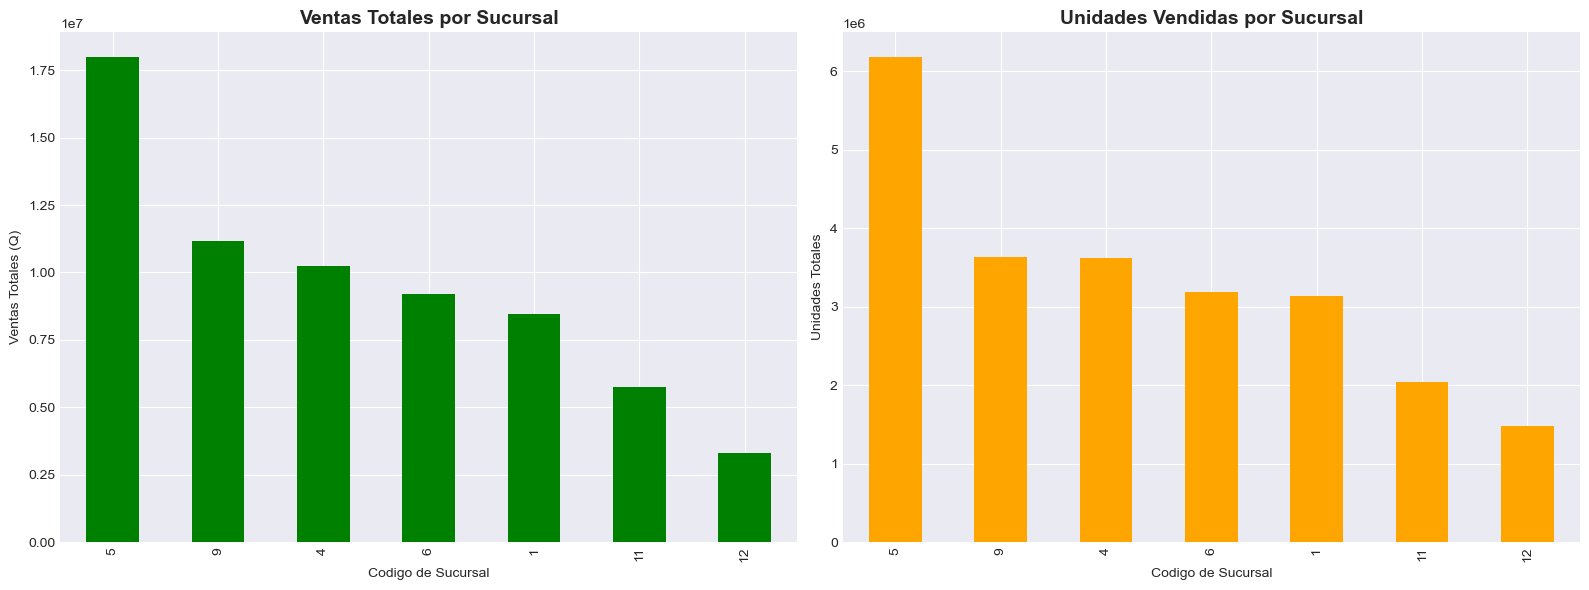

ANÁLISIS DE VENTAS POR PERÍODO DE TIEMPO

VENTAS POR AÑO:


,Total_Ventas,Venta_Promedio,Num_Transacciones
Año,,,
2020,7817390.70,787.73,9924
2021,14042643.15,1023.07,13726
2022,10783170.00,845.61,12752
2023,10942715.95,848.93,12890
2024,11961541.94,872.40,13711
2025,10540590.45,1038.48,10150



VENTAS POR MES:


,Total_Ventas,Venta_Promedio,Num_Transacciones
Mes,,,
1,4420486.10,684.82,6455
2,4456620.95,734.08,6071
3,8659285.50,1324.66,6537
4,6611568.80,1063.81,6215
5,5964995.55,968.19,6161
6,3314626.15,631.36,5250
7,4900967.25,810.88,6044
8,4075346.69,648.63,6283
9,3871792.45,668.82,5789



VENTAS POR DÍA DE LA SEMANA:


,Total_Ventas,Venta_Promedio,Num_Transacciones
Día_Semana,,,
Monday,11940399.15,954.39,12511
Tuesday,13841153.50,1108.27,12489
Wednesday,12028840.04,982.51,12243
Thursday,11047040.85,915.25,12070
Friday,10886324.30,893.93,12178
Saturday,6074616.10,565.29,10746
Sunday,269678.25,294.41,916


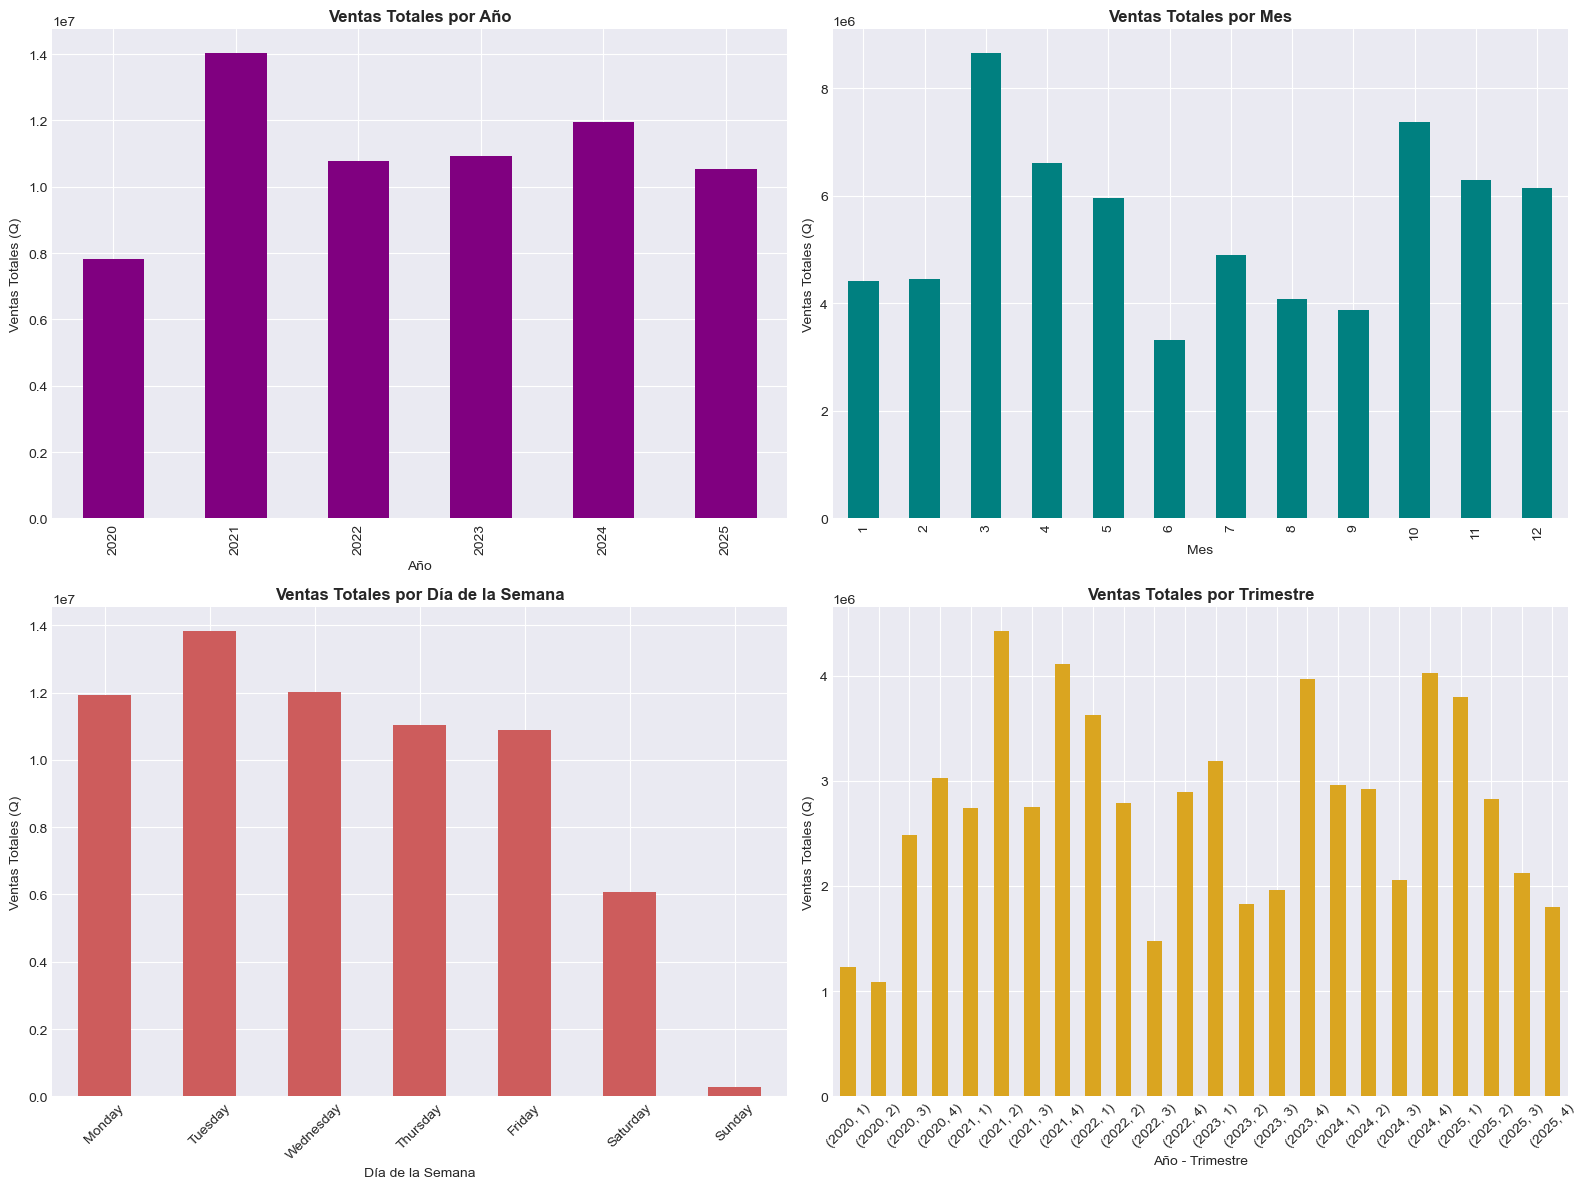

In [ ]:
# 5a. Métricas estadísticas básicas
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS GENERALES")
print("="*80)
display(df.describe())

print("\n" + "="*80)
print("ESTADÍSTICAS DETALLADAS POR VARIABLE")
print("="*80)

for col in ['Unidades_Vendidas', 'Total']:
    print(f"\n{col}:")
    print(f"  Media: {df[col].mean():,.2f}")
    print(f"  Mediana: {df[col].median():,.2f}")
    print(f"  Mínimo: {df[col].min():,.2f}")
    print(f"  Máximo: {df[col].max():,.2f}")
    print(f"  Desviación estándar: {df[col].std():,.2f}")
    print(f"  Coeficiente de variación: {(df[col].std()/df[col].mean())*100:.2f}%")

# %%
# 5b.i. Distribución de ventas por producto
print("="*80)
print("ANÁLISIS DE VENTAS POR PRODUCTO")
print("="*80)

ventas_por_producto = df.groupby('Codigo_Producto').agg({
    'Total': ['sum', 'mean', 'count'],
    'Unidades_Vendidas': ['sum', 'mean']
}).round(2)

ventas_por_producto.columns = ['Total_Ventas', 'Venta_Promedio', 'Num_Transacciones', 
                                 'Total_Unidades', 'Unidades_Promedio']
ventas_por_producto = ventas_por_producto.sort_values('Total_Ventas', ascending=False)

display(ventas_por_producto)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ventas_por_producto['Total_Ventas'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Ventas Totales por Producto', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Codigo de Producto')
axes[0].set_ylabel('Ventas Totales (Q)')
axes[0].tick_params(axis='x', rotation=45)

ventas_por_producto['Total_Unidades'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Unidades Vendidas por Producto', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Codigo de Producto')
axes[1].set_ylabel('Unidades Totales')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5b.ii. Distribución de ventas por sucursal
print("="*80)
print("ANÁLISIS DE VENTAS POR SUCURSAL")
print("="*80)

ventas_por_sucursal = df.groupby('Codigo_Sucursal').agg({
    'Total': ['sum', 'mean', 'count'],
    'Unidades_Vendidas': ['sum', 'mean']
}).round(2)

ventas_por_sucursal.columns = ['Total_Ventas', 'Venta_Promedio', 'Num_Transacciones', 
                                'Total_Unidades', 'Unidades_Promedio']
ventas_por_sucursal = ventas_por_sucursal.sort_values('Total_Ventas', ascending=False)

display(ventas_por_sucursal)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ventas_por_sucursal['Total_Ventas'].plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Ventas Totales por Sucursal', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Codigo de Sucursal')
axes[0].set_ylabel('Ventas Totales (Q)')

ventas_por_sucursal['Total_Unidades'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Unidades Vendidas por Sucursal', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Codigo de Sucursal')
axes[1].set_ylabel('Unidades Totales')

plt.tight_layout()
plt.show()

# 5b.iii. Distribución de ventas por periodo de tiempo
print("="*80)
print("ANÁLISIS DE VENTAS POR PERÍODO DE TIEMPO")
print("="*80)

# Crear variables temporales
df['Año'] = df['Fecha_Venta'].dt.year
df['Mes'] = df['Fecha_Venta'].dt.month
df['Mes_Nombre'] = df['Fecha_Venta'].dt.month_name()
df['Día_Semana'] = df['Fecha_Venta'].dt.day_name()
df['Semana'] = df['Fecha_Venta'].dt.isocalendar().week
df['Trimestre'] = df['Fecha_Venta'].dt.quarter

# Por año
print("\nVENTAS POR AÑO:")
ventas_por_año = df.groupby('Año')['Total'].agg(['sum', 'mean', 'count']).round(2)
ventas_por_año.columns = ['Total_Ventas', 'Venta_Promedio', 'Num_Transacciones']
display(ventas_por_año)

# Por mes
print("\nVENTAS POR MES:")
ventas_por_mes = df.groupby('Mes')['Total'].agg(['sum', 'mean', 'count']).round(2)
ventas_por_mes.columns = ['Total_Ventas', 'Venta_Promedio', 'Num_Transacciones']
display(ventas_por_mes)

# Por día de la semana
print("\nVENTAS POR DÍA DE LA SEMANA:")
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia = df.groupby('Día_Semana')['Total'].agg(['sum', 'mean', 'count']).round(2)
ventas_por_dia = ventas_por_dia.reindex(orden_dias)
ventas_por_dia.columns = ['Total_Ventas', 'Venta_Promedio', 'Num_Transacciones']
display(ventas_por_dia)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Ventas por año
ventas_por_año['Total_Ventas'].plot(kind='bar', ax=axes[0, 0], color='purple')
axes[0, 0].set_title('Ventas Totales por Año', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Ventas Totales (Q)')

# Ventas por mes
ventas_por_mes['Total_Ventas'].plot(kind='bar', ax=axes[0, 1], color='teal')
axes[0, 1].set_title('Ventas Totales por Mes', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Ventas Totales (Q)')

# Ventas por día de semana
ventas_por_dia['Total_Ventas'].plot(kind='bar', ax=axes[1, 0], color='indianred')
axes[1, 0].set_title('Ventas Totales por Día de la Semana', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Día de la Semana')
axes[1, 0].set_ylabel('Ventas Totales (Q)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Ventas por trimestre
ventas_por_trimestre = df.groupby(['Año', 'Trimestre'])['Total'].sum()
ventas_por_trimestre.plot(kind='bar', ax=axes[1, 1], color='goldenrod')
axes[1, 1].set_title('Ventas Totales por Trimestre', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Año - Trimestre')
axes[1, 1].set_ylabel('Ventas Totales (Q)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
ventas_por_dia

,Total_Ventas,Venta_Promedio,Num_Transacciones
Día_Semana,,,
Monday,11940399.15,954.39,12511
Tuesday,13841153.50,1108.27,12489
Wednesday,12028840.04,982.51,12243
Thursday,11047040.85,915.25,12070
Friday,10886324.30,893.93,12178
Saturday,6074616.10,565.29,10746
Sunday,269678.25,294.41,916


IDENTIFICACIÓN DE PICOS Y CAÍDAS ABRUPTAS

Número de días con picos anormales: 117
Número de días con caídas anormales: 0

Top 5 días con mayores picos de ventas:


,Fecha_Venta,Total_Ventas
1579,2025-03-04,577848.35
1270,2024-03-05,495618.00
1772,2025-10-21,429411.50
1269,2024-03-04,372439.55
1406,2024-08-13,294673.90


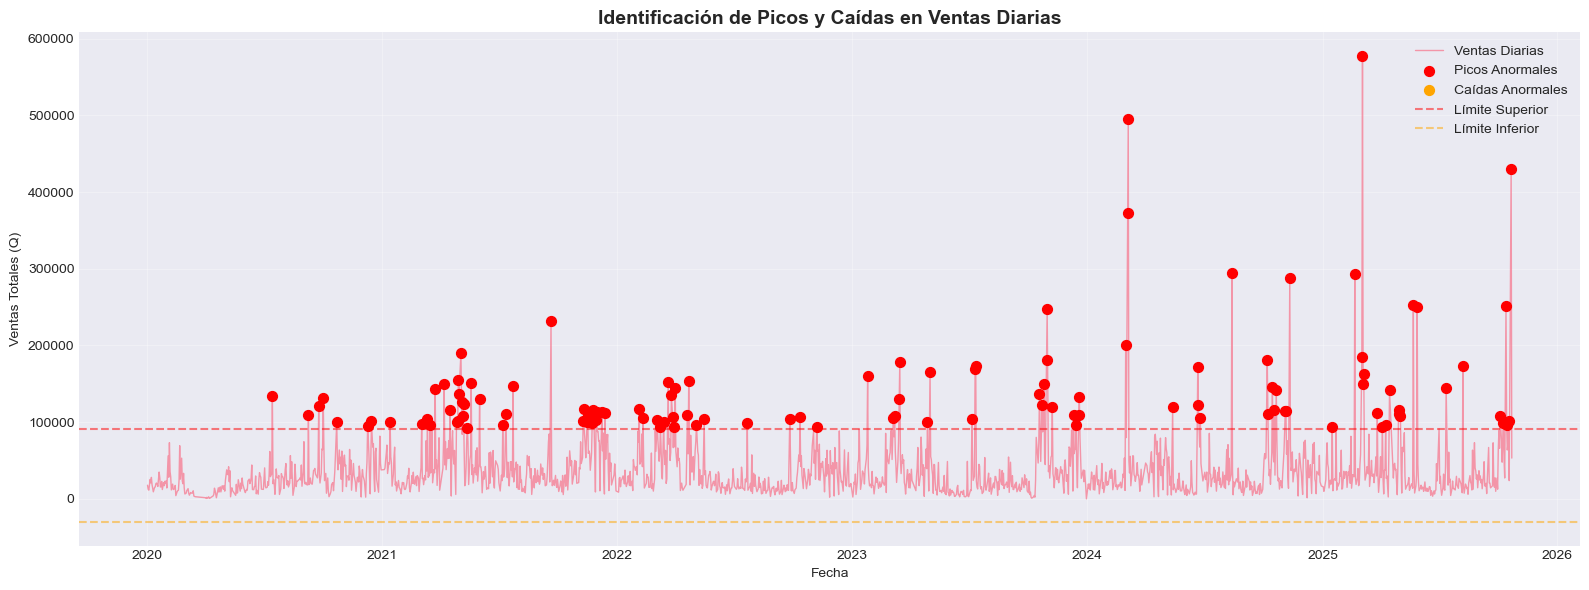

ANÁLISIS DE CICLOS TEMPORALES

PROMEDIO DE VENTAS POR DÍA DE LA SEMANA:


Día_Semana
Monday        954.392067
Tuesday      1108.267555
Wednesday     982.507559
Thursday      915.247792
Friday        893.933675
Saturday      565.290908
Sunday        294.408570
Name: Total, dtype: float64


PROMEDIO DE VENTAS POR MES DEL AÑO:


Enero          684.815817
Febrero        734.083504
Marzo         1324.657412
Abril         1063.808335
Mayo           968.186260
Junio          631.357362
Julio          810.881411
Agosto         648.630700
Septiembre     668.818872
Octubre       1245.947222
Noviembre     1027.025523
Diciembre      975.018570
Name: Total, dtype: float64

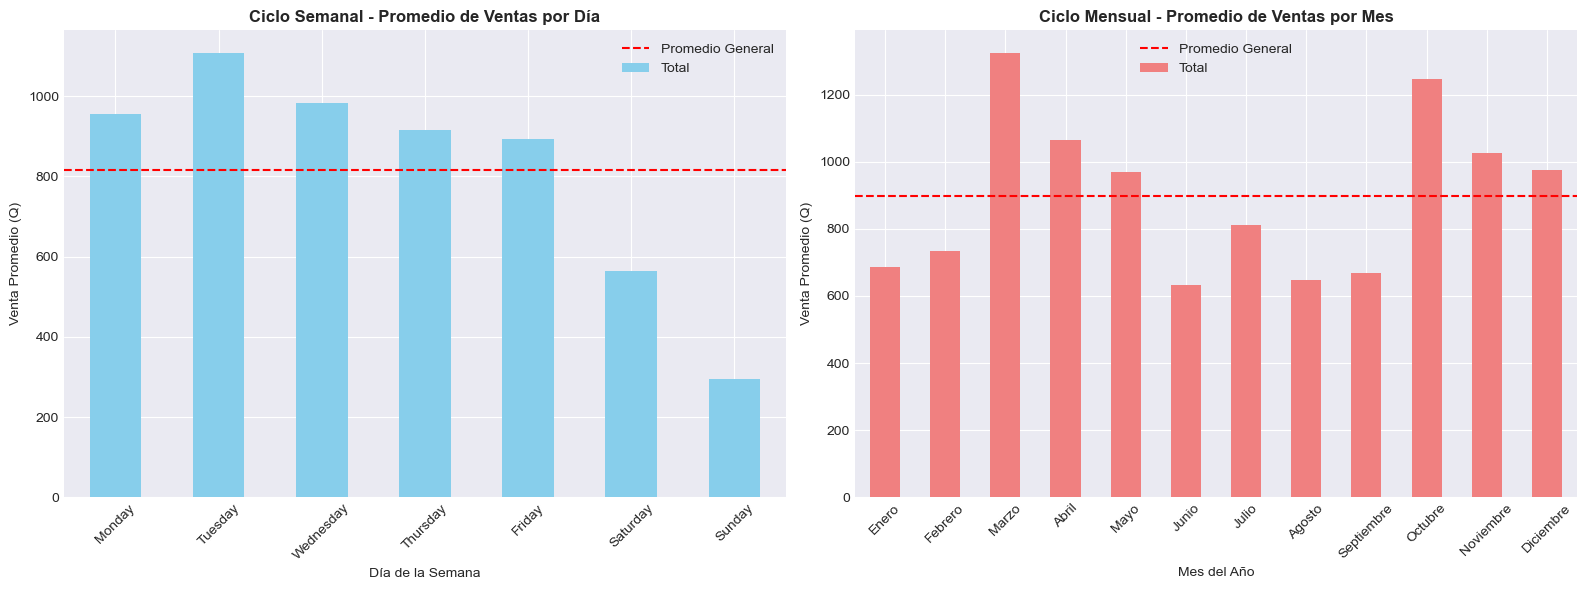


HALLAZGOS DE CICLOS:
   - Día con MAYOR venta promedio: Tuesday
   - Día con MENOR venta promedio: Sunday
   - Mes con MAYOR venta promedio: Marzo
   - Mes con MENOR venta promedio: Junio


In [22]:
# 6b.iii. Picos o caídas abruptas
print("="*80)
print("IDENTIFICACIÓN DE PICOS Y CAÍDAS ABRUPTAS")
print("="*80)

# Crear ventas_por_dia correctamente
ventas_por_dia = df.groupby('Fecha_Venta', as_index=False)['Total'].sum()
ventas_por_dia.rename(columns={'Total':'Total_Ventas'}, inplace=True)

# Calcular percentiles para identificar outliers
Q1 = ventas_por_dia['Total_Ventas'].quantile(0.25)
Q3 = ventas_por_dia['Total_Ventas'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

picos = ventas_por_dia[ventas_por_dia['Total_Ventas'] > limite_superior].copy()
caidas = ventas_por_dia[ventas_por_dia['Total_Ventas'] < limite_inferior].copy()

print(f"\nNúmero de días con picos anormales: {len(picos)}")
print(f"Número de días con caídas anormales: {len(caidas)}")

if len(picos) > 0:
    print("\nTop 5 días con mayores picos de ventas:")
    display(picos.nlargest(5, 'Total_Ventas'))

if len(caidas) > 0:
    print("\nTop 5 días con mayores caídas de ventas:")
    display(caidas.nsmallest(5, 'Total_Ventas'))

# Visualización con picos y caídas marcados
plt.figure(figsize=(16, 6))
plt.plot(ventas_por_dia['Fecha_Venta'], ventas_por_dia['Total_Ventas'], 
         linewidth=1, label='Ventas Diarias', alpha=0.7)
plt.scatter(picos['Fecha_Venta'], picos['Total_Ventas'], 
           color='red', s=50, label='Picos Anormales', zorder=5)
plt.scatter(caidas['Fecha_Venta'], caidas['Total_Ventas'], 
           color='orange', s=50, label='Caídas Anormales', zorder=5)
plt.axhline(y=limite_superior, color='red', linestyle='--', alpha=0.5, label='Límite Superior')
plt.axhline(y=limite_inferior, color='orange', linestyle='--', alpha=0.5, label='Límite Inferior')
plt.title('Identificación de Picos y Caídas en Ventas Diarias', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (Q)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 6b.iv. Ciclos por días de la semana o meses del año
print("="*80)
print("ANÁLISIS DE CICLOS TEMPORALES")
print("="*80)

# Promedio de ventas por día de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia_semana_prom = df.groupby('Día_Semana')['Total'].mean().reindex(orden_dias)
print("\nPROMEDIO DE VENTAS POR DÍA DE LA SEMANA:")
display(ventas_dia_semana_prom)

# Promedio de ventas por mes
meses_nombres = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ventas_mes_prom = df.groupby('Mes')['Total'].mean()
ventas_mes_prom.index = meses_nombres
print("\nPROMEDIO DE VENTAS POR MES DEL AÑO:")
display(ventas_mes_prom)

# Visualización de ciclos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ciclo semanal
ventas_dia_semana_prom.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Ciclo Semanal - Promedio de Ventas por Día', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Día de la Semana')
axes[0].set_ylabel('Venta Promedio (Q)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=ventas_dia_semana_prom.mean(), color='red', linestyle='--', label='Promedio General')
axes[0].legend()

# Ciclo mensual
ventas_mes_prom.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Ciclo Mensual - Promedio de Ventas por Mes', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Mes del Año')
axes[1].set_ylabel('Venta Promedio (Q)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=ventas_mes_prom.mean(), color='red', linestyle='--', label='Promedio General')
axes[1].legend()

plt.tight_layout()
plt.show()

# Identificar días y meses con mayor/menor venta
dia_mayor_venta = ventas_dia_semana_prom.idxmax()
dia_menor_venta = ventas_dia_semana_prom.idxmin()
mes_mayor_venta = ventas_mes_prom.idxmax()
mes_menor_venta = ventas_mes_prom.idxmin()

print(f"\nHALLAZGOS DE CICLOS:")
print(f"   - Día con MAYOR venta promedio: {dia_mayor_venta}")
print(f"   - Día con MENOR venta promedio: {dia_menor_venta}")
print(f"   - Mes con MAYOR venta promedio: {mes_mayor_venta}")
print(f"   - Mes con MENOR venta promedio: {mes_menor_venta}")


7. Análisis Comparativo entre Sucursales y Productos

ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS

TOP 5 PRODUCTOS MÁS VENDIDOS (por ventas totales):


,Total_Ventas,Venta_Promedio,Num_Transacciones,Total_Unidades,Unidades_Promedio
Codigo_Producto,,,,,
P105400,10827190.15,1660.36,6521,3289162,504.40
P407780,9146653.25,1563.80,5849,2729360,466.64
P966547,6235175.70,986.42,6321,1502070,237.63
P967817,5939242.10,4445.54,1336,1421198,1063.77
P847357,4995610.00,1454.75,3434,1591786,463.54



TOP 5 PRODUCTOS MENOS VENDIDOS (por ventas totales):


,Total_Ventas,Venta_Promedio,Num_Transacciones,Total_Unidades,Unidades_Promedio
Codigo_Producto,,,,,
P958288,1185086.15,150.87,7855,1420582,180.85
P185447,1191841.15,149.28,7984,1617477,202.59
P165627,2085623.70,225.33,9256,2543426,274.79
P639991,2286337.20,896.25,2551,871507,341.63
P269262,2712340.09,699.96,3875,895630,231.13


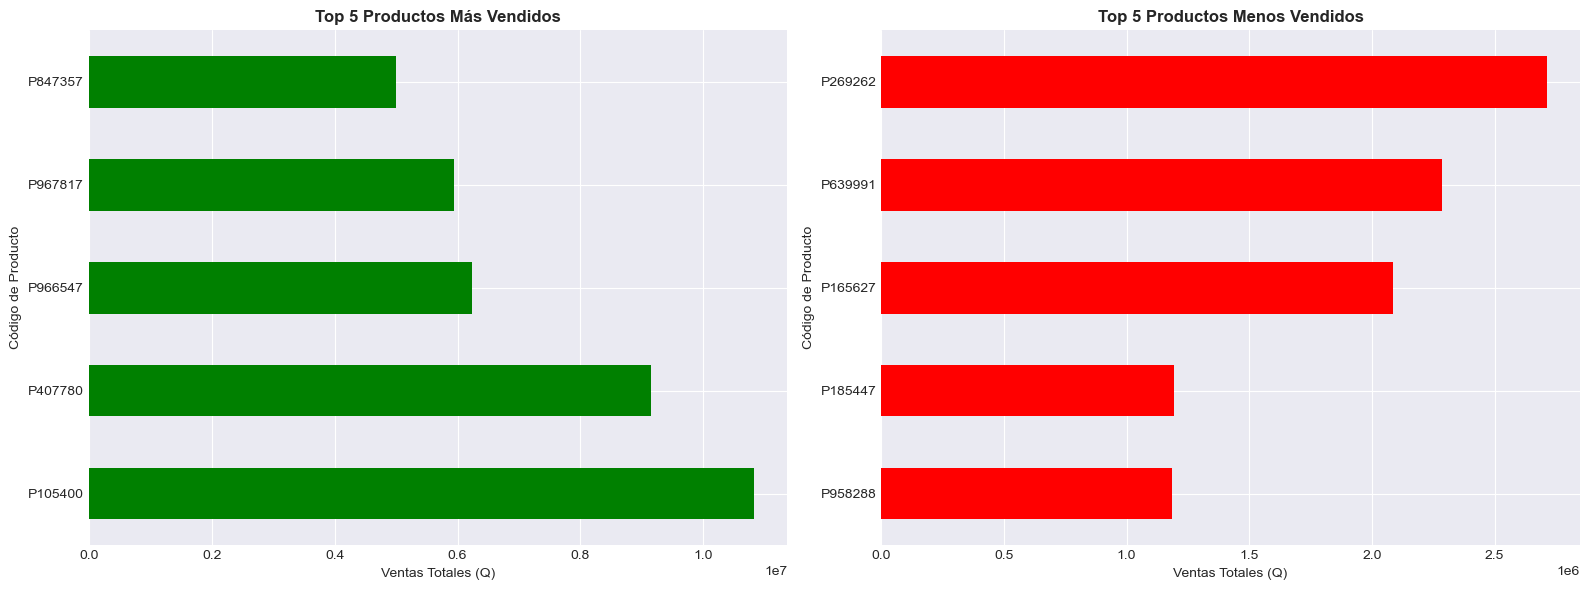

COMPARACIÓN DE DESEMPEÑO ENTRE SUCURSALES

RESUMEN DE DESEMPEÑO POR SUCURSAL:


,Total_Ventas,Venta_Promedio,Num_Transacciones,Total_Unidades,Unidades_Promedio,Participacion_%
Codigo_Sucursal,,,,,,
5,18006561.65,1502.80,11982,6186687,516.33,27.25
9,11154398.74,1229.00,9076,3630033,399.96,16.88
4,10235764.15,976.14,10486,3623925,345.60,15.49
6,9208113.05,848.13,10857,3185865,293.44,13.93
1,8441216.80,790.52,10678,3142344,294.28,12.77
11,5755009.45,561.30,10253,2036407,198.62,8.71
12,3286988.35,334.69,9821,1483006,151.00,4.97



RANKING DE SUCURSALES:
1. Sucursal 5: Q18,006,561.65
2. Sucursal 9: Q11,154,398.74
3. Sucursal 4: Q10,235,764.15
4. Sucursal 6: Q9,208,113.05
5. Sucursal 1: Q8,441,216.80
6. Sucursal 11: Q5,755,009.45
7. Sucursal 12: Q3,286,988.35

PARTICIPACIÓN DE MERCADO POR SUCURSAL:


,Total_Ventas,Participacion_%
Codigo_Sucursal,,
5,18006561.65,27.25
9,11154398.74,16.88
4,10235764.15,15.49
6,9208113.05,13.93
1,8441216.80,12.77
11,5755009.45,8.71
12,3286988.35,4.97


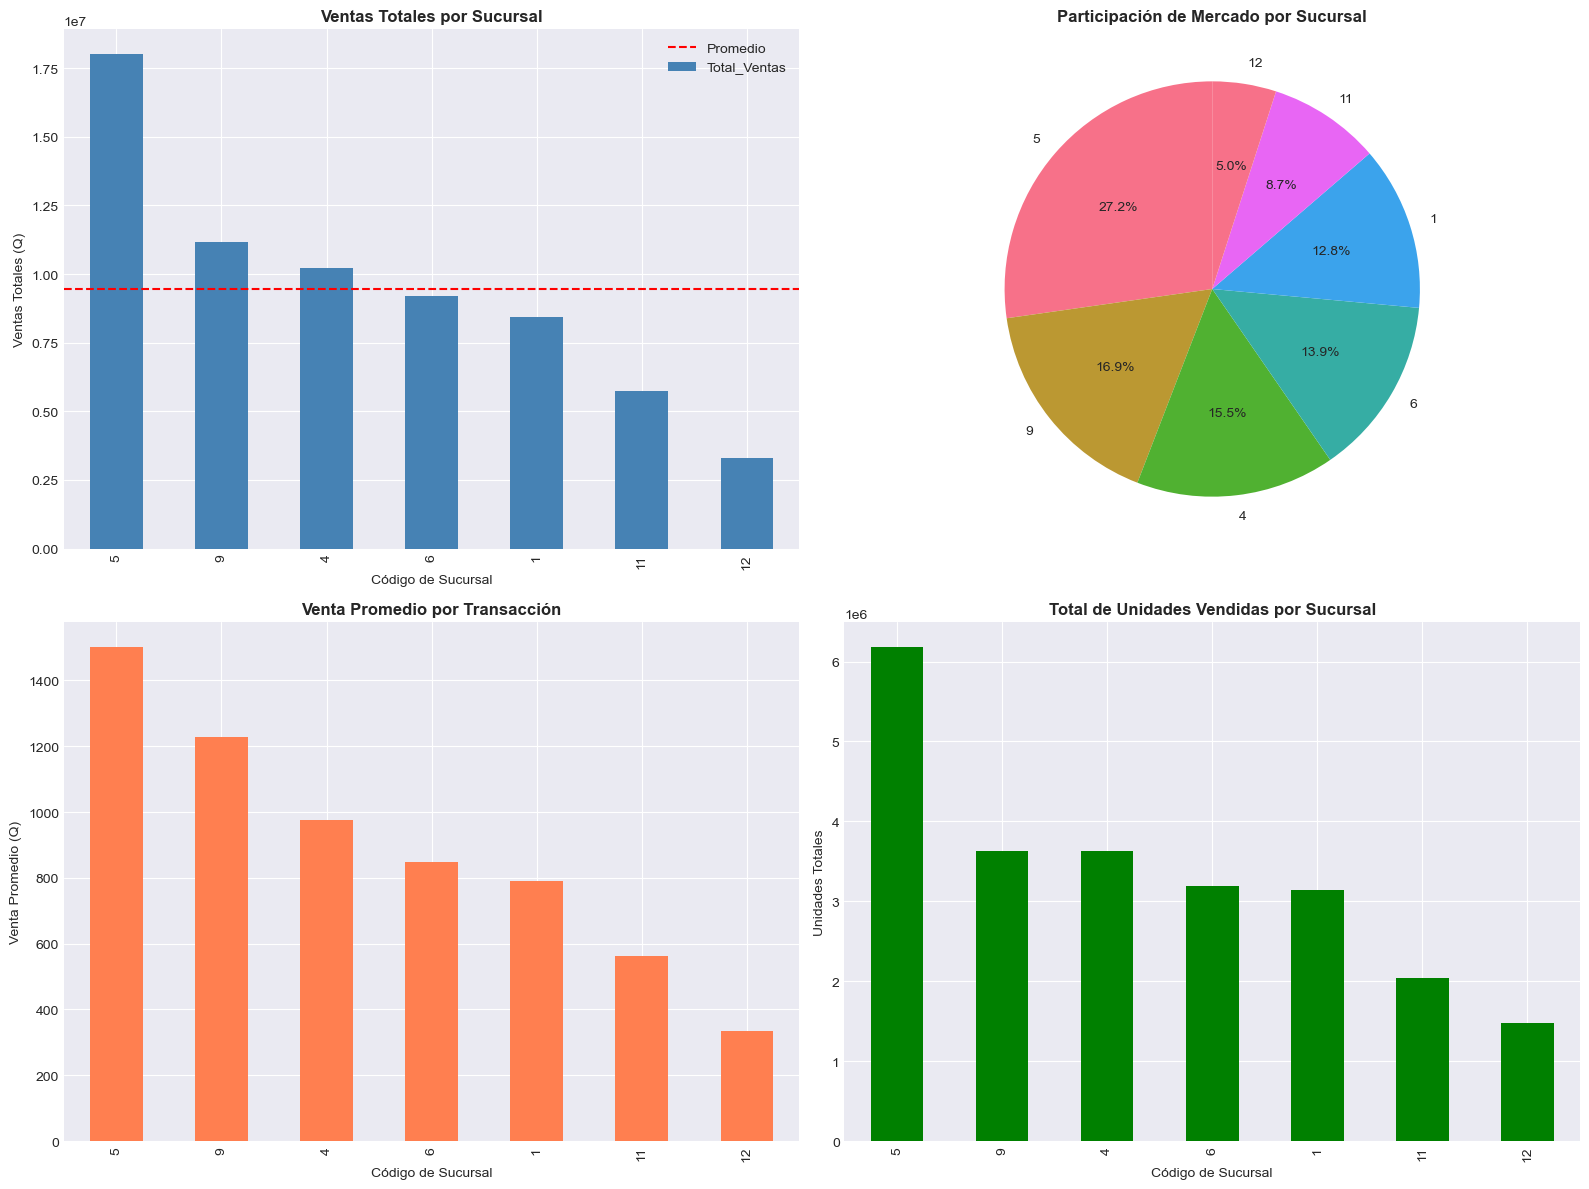

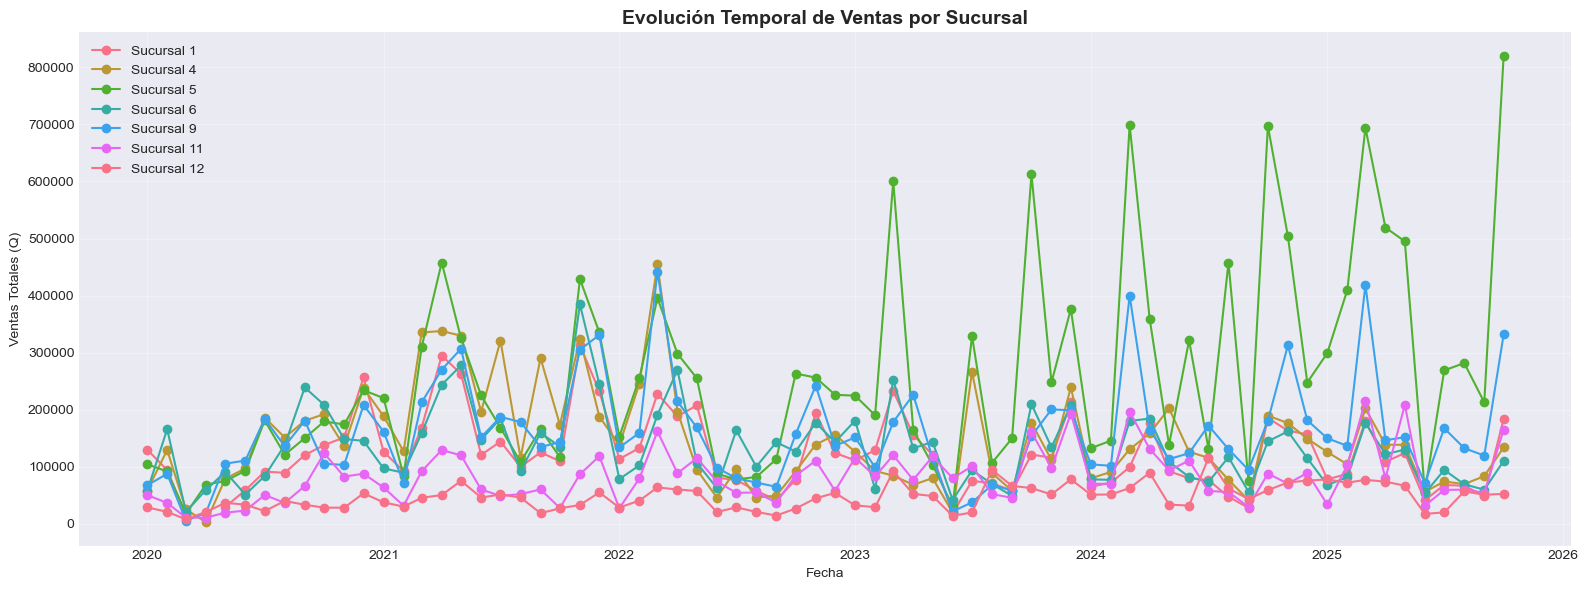

DETECCIÓN DE OUTLIERS Y COMPORTAMIENTOS ANÓMALOS

OUTLIERS POR SUCURSAL:
  Sucursal 11: 1409 outliers (13.74%)
  Sucursal 12: 1052 outliers (10.71%)
  Sucursal 1: 1061 outliers (9.94%)
  Sucursal 6: 1413 outliers (13.01%)
  Sucursal 9: 974 outliers (10.73%)
  Sucursal 4: 1282 outliers (12.23%)
  Sucursal 5: 1325 outliers (11.06%)

OUTLIERS POR PRODUCTO:
  Producto P105400: 596 outliers (9.14%)
  Producto P407780: 574 outliers (9.81%)
  Producto P185447: 1071 outliers (13.41%)
  Producto P958288: 994 outliers (12.65%)
  Producto P513865: 697 outliers (10.43%)
  Producto P165627: 1071 outliers (11.57%)
  Producto P041436: 497 outliers (9.89%)
  Producto P269262: 339 outliers (8.75%)
  Producto P967817: 121 outliers (9.06%)
  Producto P966547: 633 outliers (10.01%)
  Producto P715789: 93 outliers (12.67%)
  Producto P639991: 384 outliers (15.05%)
  Producto P229767: 293 outliers (9.21%)
  Producto P831996: 222 outliers (8.70%)
  Producto P847357: 288 outliers (8.39%)


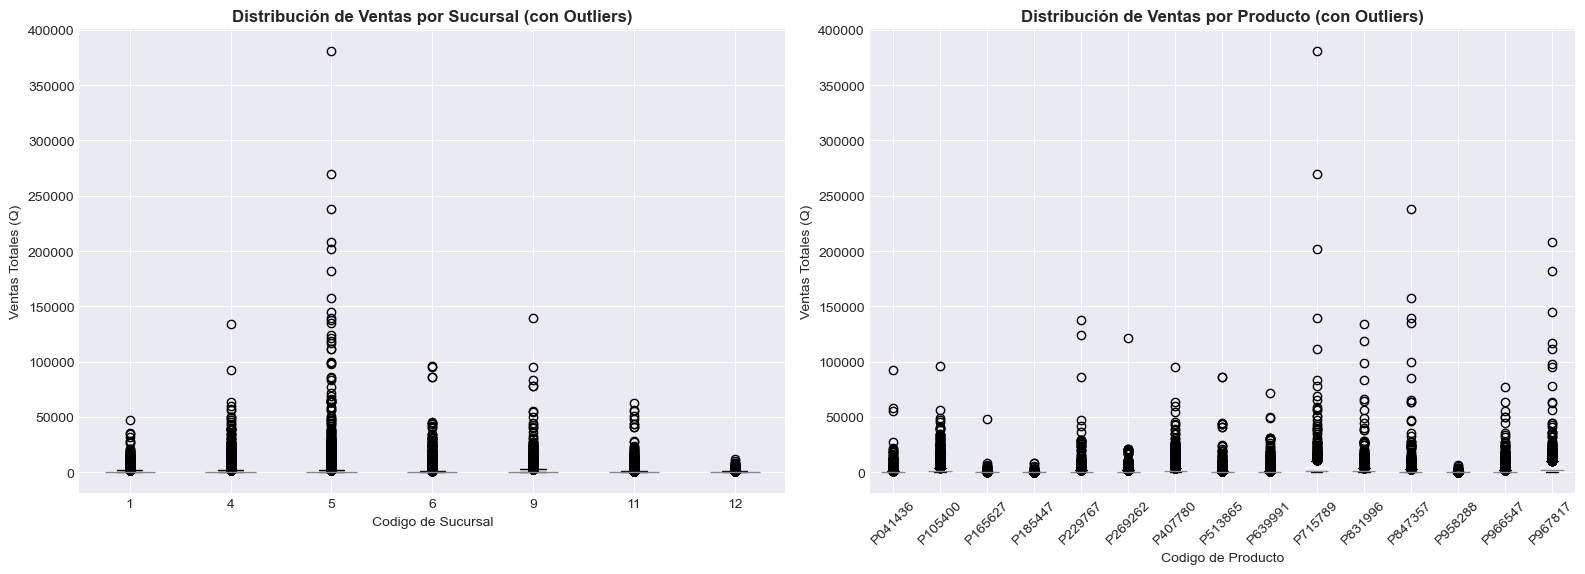


COMBINACIONES SUCURSAL-PRODUCTO CON COMPORTAMIENTO ANÓMALO:

Top 10 combinaciones con mayor variabilidad:


sum         mean           std  \
Codigo_Sucursal Codigo_Producto                                          
11              P165627           205854.75   158.349808   1361.644744   
4               P041436           532374.90   766.007050   3971.880402   
5               P269262           745866.85  1100.098599   5205.830092   
                P229767          1323752.80  2330.550704   9798.081225   
                P847357          2110207.75  4350.943814  18028.856611   
11              P513865           768480.80   777.814575   3081.794464   
4               P185447           129115.00   119.000000    428.462458   
5               P639991           828762.90  1504.106897   5364.604160   
4               P831996           895034.90  2393.141444   8044.051047   
6               P513865          1497211.30  1509.285585   5038.863700   

                                         CV  
Codigo_Sucursal Codigo_Producto              
11              P165627          859.896683  
4               P041436          518.517473  
5               P269262          473.214864  
                P229767          420.419140  
                P847357          414.366569  
11              P513865          396.211972  
4               P185447          360.052486  
5               P639991          356.663757  
4               P831996          336.129361  
6               P513865          333.857538

In [26]:
# 7a. Productos más vendidos y menos vendidos
print("="*80)
print("ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS")
print("="*80)

# Top 5 productos más vendidos
print("\nTOP 5 PRODUCTOS MÁS VENDIDOS (por ventas totales):")
top_productos = ventas_por_producto.nlargest(5, 'Total_Ventas')
display(top_productos)

print("\nTOP 5 PRODUCTOS MENOS VENDIDOS (por ventas totales):")
bottom_productos = ventas_por_producto.nsmallest(5, 'Total_Ventas')
display(bottom_productos)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top productos
top_productos['Total_Ventas'].plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Top 5 Productos Más Vendidos', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ventas Totales (Q)')
axes[0].set_ylabel('Código de Producto')

# Bottom productos
bottom_productos['Total_Ventas'].plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title('Top 5 Productos Menos Vendidos', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Ventas Totales (Q)')
axes[1].set_ylabel('Código de Producto')

plt.tight_layout()
plt.show()

# %%
# 7b. Comparar desempeño entre sucursales
print("="*80)
print("COMPARACIÓN DE DESEMPEÑO ENTRE SUCURSALES")
print("="*80)

# Análisis detallado por sucursal
print("\nRESUMEN DE DESEMPEÑO POR SUCURSAL:")
display(ventas_por_sucursal)

# Ranking de sucursales
print("\nRANKING DE SUCURSALES:")
for i, (sucursal, row) in enumerate(ventas_por_sucursal.iterrows(), 1):
    print(f"{i}. Sucursal {sucursal}: Q{row['Total_Ventas']:,.2f}")

# Calcular participación de mercado
ventas_por_sucursal['Participacion_%'] = (ventas_por_sucursal['Total_Ventas'] / 
                                           ventas_por_sucursal['Total_Ventas'].sum() * 100).round(2)

print("\nPARTICIPACIÓN DE MERCADO POR SUCURSAL:")
display(ventas_por_sucursal[['Total_Ventas', 'Participacion_%']])

# Visualizaciones comparativas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Ventas totales por sucursal
ventas_por_sucursal['Total_Ventas'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Ventas Totales por Sucursal', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Código de Sucursal')
axes[0, 0].set_ylabel('Ventas Totales (Q)')
axes[0, 0].axhline(y=ventas_por_sucursal['Total_Ventas'].mean(), 
                    color='red', linestyle='--', label='Promedio')
axes[0, 0].legend()

# Participación de mercado
axes[0, 1].pie(ventas_por_sucursal['Participacion_%'], 
               labels=ventas_por_sucursal.index,
               autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Participación de Mercado por Sucursal', fontsize=12, fontweight='bold')

# Venta promedio por transacción
ventas_por_sucursal['Venta_Promedio'].plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Venta Promedio por Transacción', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Código de Sucursal')
axes[1, 0].set_ylabel('Venta Promedio (Q)')

# Unidades vendidas por sucursal
ventas_por_sucursal['Total_Unidades'].plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Total de Unidades Vendidas por Sucursal', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Código de Sucursal')
axes[1, 1].set_ylabel('Unidades Totales')

plt.tight_layout()
plt.show()

# Comparación temporal entre sucursales
ventas_sucursal_mes = df.groupby([df['Fecha_Venta'].dt.to_period('M'), 
                                   'Codigo_Sucursal'])['Total'].sum().unstack()
ventas_sucursal_mes.index = ventas_sucursal_mes.index.to_timestamp()

plt.figure(figsize=(16, 6))
for sucursal in ventas_sucursal_mes.columns:
    plt.plot(ventas_sucursal_mes.index, ventas_sucursal_mes[sucursal], 
             marker='o', label=f'Sucursal {sucursal}')
plt.title('Evolución Temporal de Ventas por Sucursal', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (Q)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# 7c. Detectar outliers por sucursal y producto
print("="*80)
print("DETECCIÓN DE OUTLIERS Y COMPORTAMIENTOS ANÓMALOS")
print("="*80)

# Outliers por sucursal
print("\nOUTLIERS POR SUCURSAL:")
for sucursal in df['Codigo_Sucursal'].unique():
    datos_sucursal = df[df['Codigo_Sucursal'] == sucursal]['Total']
    Q1 = datos_sucursal.quantile(0.25)
    Q3 = datos_sucursal.quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos_sucursal[(datos_sucursal < Q1 - 1.5*IQR) | 
                               (datos_sucursal > Q3 + 1.5*IQR)]
    print(f"  Sucursal {sucursal}: {len(outliers)} outliers ({len(outliers)/len(datos_sucursal)*100:.2f}%)")

# Outliers por producto
print("\nOUTLIERS POR PRODUCTO:")
for producto in df['Codigo_Producto'].unique():
    datos_producto = df[df['Codigo_Producto'] == producto]['Total']
    Q1 = datos_producto.quantile(0.25)
    Q3 = datos_producto.quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos_producto[(datos_producto < Q1 - 1.5*IQR) | 
                               (datos_producto > Q3 + 1.5*IQR)]
    print(f"  Producto {producto}: {len(outliers)} outliers ({len(outliers)/len(datos_producto)*100:.2f}%)")

# Visualización de outliers con boxplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot por sucursal
df.boxplot(column='Total', by='Codigo_Sucursal', ax=axes[0])
axes[0].set_title('Distribución de Ventas por Sucursal (con Outliers)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Codigo de Sucursal')
axes[0].set_ylabel('Ventas Totales (Q)')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Boxplot por producto
df.boxplot(column='Total', by='Codigo_Producto', ax=axes[1])
axes[1].set_title('Distribución de Ventas por Producto (con Outliers)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Codigo de Producto')
axes[1].set_ylabel('Ventas Totales (Q)')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.suptitle('')  # Remover título automático
plt.tight_layout()
plt.show()

# Identificar combinaciones sucursal-producto con comportamiento anómalo
print("\nCOMBINACIONES SUCURSAL-PRODUCTO CON COMPORTAMIENTO ANÓMALO:")
ventas_suc_prod = df.groupby(['Codigo_Sucursal', 'Codigo_Producto'])['Total'].agg(['sum', 'mean', 'std'])
ventas_suc_prod['CV'] = (ventas_suc_prod['std'] / ventas_suc_prod['mean']) * 100  # Coeficiente de variación

# Identificar combinaciones con alta variabilidad
alta_variabilidad = ventas_suc_prod[ventas_suc_prod['CV'] > ventas_suc_prod['CV'].quantile(0.90)]
print(f"\nTop 10 combinaciones con mayor variabilidad:")
display(alta_variabilidad.nlargest(10, 'CV'))

8. Visualizaciones Clave 